<font size=6><b> Setp02.샘플링

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# ----------------- 전처리  ----------------------
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA


# ----------------- 모델  ----------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans, dbscan
from sklearn.pipeline import Pipeline
    
# ----------------- 학습 ----------------------
from sklearn.model_selection import train_test_split

# ----------------- 평가 ----------------------
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve



* ref : https://www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets/notebook

<pre>
Resampling
Random under-sampling
Random over-sampling
Python imbalanced-learn module
Random under-sampling and over-sampling with imbalanced-learn
Under-sampling: Tomek links
Under-sampling: Cluster Centroids
Over-sampling: SMOTE
Over-sampling followed by under-sampling

* ref : https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/notebook

<pre>
Outline:
I. Understanding our data

II. Preprocessing
a) Scaling and Distributing
b) Splitting the Data


III. Random UnderSampling and Oversampling
a) Distributing and Correlating
b) Anomaly Detection
c) Dimensionality Reduction and Clustering (t-SNE)
d) Classifiers
e) A Deeper Look into Logistic Regression
f) Oversampling with SMOTE


* ref : https://www.kaggle.com/code/shahules/tackling-class-imbalance


<pre>
The metric trap
Data preparating
Resampling
Resampling using sklearn
Dimensionality Reduction and Clustering
Python imbalanced-learn module

* ref : https://shinminyong.tistory.com/34

# Data Load

## 샘플 데이터 생성

In [3]:
import scipy as sp

In [4]:
n0 = 200; n1 = 20
rv1 = sp.stats.multivariate_normal([-1, 0], [[1, 0], [0, 1]])
rv2 = sp.stats.multivariate_normal([+1, 0], [[1, 0], [0, 1]])
X0 = rv1.rvs(n0, random_state=0)
X1 = rv2.rvs(n1, random_state=0)
X_imb = np.vstack([X0, X1])
y_imb = np.hstack([np.zeros(n0), np.ones(n1)])

print(X_imb.shape, y_imb.shape )

(220, 2) (220,)


## 데이터 로드

In [20]:
train = pd.read_csv("../datasets/dacon_2022_tel_cls/train.csv")
test  = pd.read_csv("../datasets/dacon_2022_tel_cls/test.csv")
submit = pd.read_csv("../datasets/dacon_2022_tel_cls/sample_submission.csv")

In [21]:
train.head()

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0


In [22]:
train = train.drop('ID', axis=1)
test  = test.drop('ID', axis=1)

In [23]:
train_c0_cnt, train_c1_cnt = train['전화해지여부'].value_counts()
print(train_c0_cnt, train_c1_cnt)

train_c0 = train[train['전화해지여부'] == 0]
train_c1 = train[train['전화해지여부'] == 1]


26882 3318


In [24]:
y = train['전화해지여부']
X = train.drop('전화해지여부', axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(24160, 12) (6040, 12) (24160,) (6040,)


# 차원축소

In [64]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

In [14]:
# pca = PCA(n_components=2)
# X_train_pca = pca.fit_transform(X_train)
# classification_result3(X_train_pca , y_train, 'PCA (2 components)')

In [66]:
# tsne = TSNE(n_components=2, random_state=0)
# X_train_tsne = tsne.fit_transform(X_train)
# classification_result3(X_train_pca , y_train, 'TSNE (2 components)')

In [65]:
# svd = TruncatedSVD(n_components=2, random_state=0)
# X_train_svd = svd.fit_transform(X_train)
# classification_result3(X_train_svd , y_train, 'TruncatedSVD (2 components)')

In [67]:
# pca = PCA(n_components=2)
# tsne = TSNE(n_components=2, random_state=0)
# svd = TruncatedSVD(n_components=2, random_state=0)

# for tpl in [("PCA",pca) , ("TSNE",tsne), ("SVD",svd)]:
#     t0 = time.time()
#     dcompler_name = tpl[0]
#     dcompler = tpl[1]
#     X_train_dcom = dcompler.fit_transform(X_train)
#     t1 = time.time()
#     print(f"소요시간:{ (t1 - t0):.2f} 초")
#     classification_result3(X_train_dcom , y_train, f'{dcompler_name} (2 components)')


#################################################################################################

#-------------------- scatter --------------------------
# f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# # labels = ['No Fraud', 'Fraud']
# f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


# blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
# red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# # t-SNE scatter plot
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
# ax1.set_title('t-SNE', fontsize=14)

# ax1.grid(True)

# ax1.legend(handles=[blue_patch, red_patch])


# # PCA scatter plot
# ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
# ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
# ax2.set_title('PCA', fontsize=14)

# ax2.grid(True)

# ax2.legend(handles=[blue_patch, red_patch])

# # TruncatedSVD scatter plot
# ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
# ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
# ax3.set_title('Truncated SVD', fontsize=14)

# ax3.grid(True)

# ax3.legend(handles=[blue_patch, red_patch])

# plt.show()


# 공통함수

In [26]:
x1min = -4; x1max = 4
x2min = -2; x2max = 2
xx1 = np.linspace(x1min, x1max, 1000)
xx2 = np.linspace(x2min, x2max, 1000)
X1, X2 = np.meshgrid(xx1, xx2)

def exam_my_scatter_view(X, y, title="", df_yn=False):
    
    if bool(df_yn) :
        plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
        plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")

    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
    
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', label="0 클래스")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label="1 클래스")
    plt.contour(X1, X2, Y, colors='k', levels=[0.5])
    
    y_pred = model.predict(X)
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    return model

In [77]:
from sklearn.decomposition import PCA

def my_scatter_view(X_train, y_train, X_sampling, y_sampling, label='Imbalanced dataset (2 PCA components)'):   
    y_under.value_counts().plot(kind='bar', title='Count (target)', figsize=(3,2));
    plt.show()
    
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train)
    
    pca = PCA(n_components=2)
    X_sampling_pca = pca.fit_transform(X_sampling)
    
    
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    
    fig,(ax1,ax2)=plt.subplots(1,2, figsize=(11,4))
   
    for l, c, m in zip(np.unique(y_train), colors, markers):
        ax1.scatter(
            X_train_pca[y_train==l, 0],
            X_train_pca[y_train==l, 1],
            c=c, label=l, marker=m
        )
    for l, c, m in zip(np.unique(y_train), colors, markers):
        ax2.scatter(
            X_sampling_pca[y_sampling==l, 0],
            X_sampling_pca[y_sampling==l, 1],
            c=c, label=l, marker=m
        )
   
    ax1.set_title('original')
    ax2.set_title('sampling')
    plt.legend(loc='upper right')
    plt.show()
    

In [ ]:
def my_score(X, y) :
    # X = df_train[labels]
    # y = df_train['전화해지여부']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    model = XGBClassifier()
    model.fit(X_train, y_train)
    y_pred  = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    accuracy  = accuracy_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)
    auc       = roc_auc_score(y_test, y_proba[:, 1])
    print(f"Accuracy:{accuracy:.4f} F1:{f1:.4f} Precision:{precision:.4f} Recall:{recall:.4f} Auc:{auc:.4f} ")
    
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion matrix:\n', cm)
    
    return accuracy,  recall, precision, f1, auc, cm


In [62]:
def my_iqr_outlier(df_train, col) : 
    #fraud = df_train[col].loc[df_train['전화해지여부'] == 1].values
    fraud_values = df_train[col].loc[df_train['전화해지여부'] == 0].values
    q25, q75 = np.percentile(fraud_values, 25), np.percentile(fraud_values, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off,  q75 + cut_off
    
    print(f'q25:{q25}  q75:{q75}  IQR:{iqr}  cut_off:{cut_off}  lower:{lower} upper:{upper}')
    
    outliers = [x for x in fraud_values if x < lower or x > upper]
    print(f'Outliers: {len(outliers)},  {outliers[:5]} ... ')

    drop_idx  = df_train[ (df_train[col] > upper) | (df_train[col] < lower) ].index
    print(f"{len(drop_idx)} row  삭제")
    #df_train = df_train.drop(drop_idx, axis=0)
    print("---"*20)
    

# 전역 변수

In [ ]:
my_score_eval_list = []
accuracy,  recall, precision, f1, auc, cm = my_score(X, y)
my_score_eval_list.append( ["Orig", "Orig", accuracy,  recall, precision, f1, auc, cm, 0 ] )

# <font size=6><b> 언더샘플링

## RandomUnderSampler

In [15]:
from imblearn.under_sampling import RandomUnderSampler

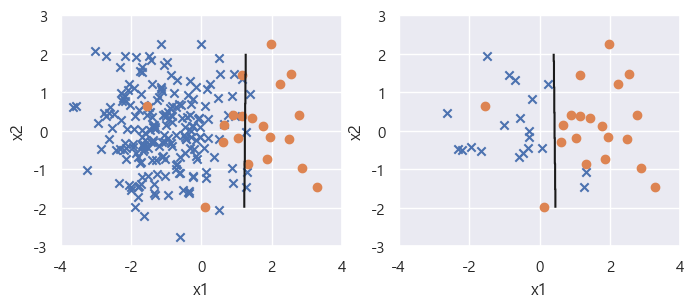

In [16]:
X_samp, y_samp = RandomUnderSampler(random_state=0).fit_sample(X_imb, y_imb)

plt.figure(figsize=(8,3))
plt.subplot(121)
exam_my_scatter_view(X_imb, y_imb)

plt.subplot(122)
model_samp = exam_my_scatter_view(X_samp, y_samp)

* Pandas sample(N개)

0    3318
1    3318
Name: 전화해지여부, dtype: int64


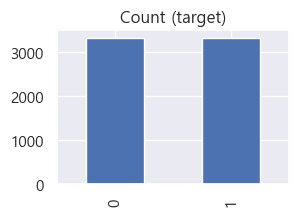

In [53]:
train_c0_under = train_c0.sample(train_c1_cnt)
train_under = pd.concat([train_c0_under, train_c1], axis=0)

print(train_under['전화해지여부'].value_counts())
train_under['전화해지여부'].value_counts().plot(kind='bar', title='Count (target)', figsize=(3,2));

* Python RandomUnderSampler()

6636 rows Removed indexes:  [13466  5786 28453 ... 30169 30176 30198]
0    3318
1    3318
Name: 전화해지여부, dtype: int64


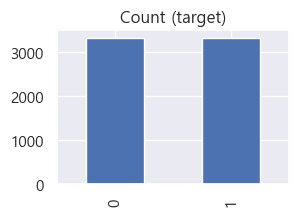

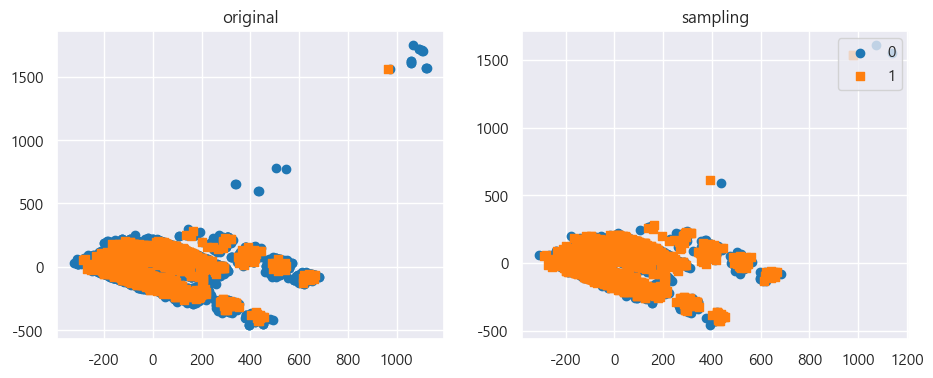

In [78]:
sm = RandomUnderSampler()

t0 = time.time()
X_samp, y_samp = sm.fit_sample(X, y)
t1 = time.time()
accuracy,  recall, precision, f1, auc, cm = my_score(X_samp, y_samp)
my_score_eval_list.append( ["Under", "RandomUnderSampler", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )

# print(f"{len(sm.sample_indices_)} rows Removed indexes:  {sm.sample_indices_}")
print( y_under.value_counts() )

my_scatter_view(X_train, y_train, X_samp, y_samp, 'RandomUnderSampler')

## Tomek link
* 서로 다른 클래스끼리 가장 가까운 데이터들이 토멕링크로 묶여서 토멕링크 중 분포가 높은 데이터를 제거하는 방법

<img src="https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/tomek.png?v=2">

In [44]:
from imblearn.under_sampling import TomekLinks

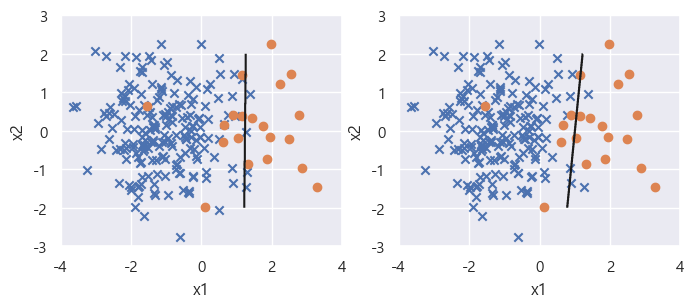

In [45]:
X_samp, y_samp = TomekLinks().fit_sample(X_imb, y_imb)

plt.figure(figsize=(8,3))
plt.subplot(121)
exam_my_scatter_view(X_imb, y_imb)

plt.subplot(122)
model_samp = exam_my_scatter_view(X_samp, y_samp)

* Python TomekLinks()

29469 rows Removed indexes:  [    0     1     2 ... 30197 30198 30199]
0    26151
1     3318
Name: 전화해지여부, dtype: int64


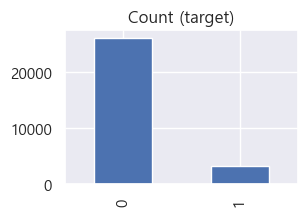

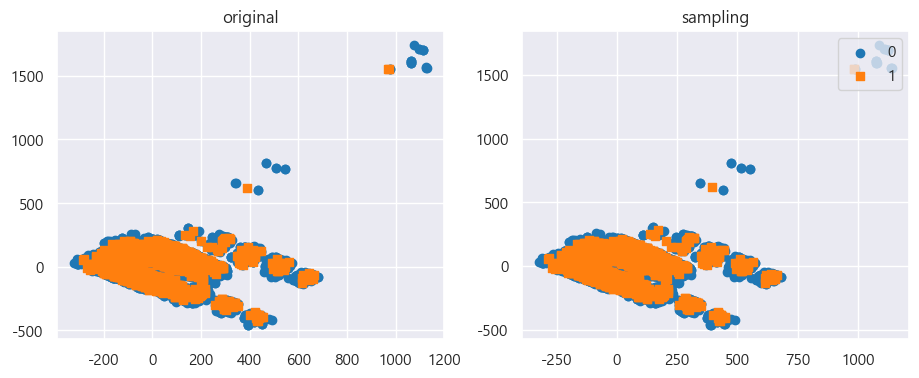

In [80]:
sm = TomekLinks(sampling_strategy='auto')  #majority'

t0 = time.time()
X_samp, y_samp = sm.fit_sample(X, y)
t1 = time.time()
accuracy,  recall, precision, f1, auc, cm = my_score(X_samp, y_samp)
my_score_eval_list.append( ["Under", "TomekLinks", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )


print(f"{len(sm.sample_indices_)} rows Removed indexes:  {sm.sample_indices_}")
print( y_under.value_counts() )

my_scatter_view(X, y,  X_samp, y_samp , 'TomekLinks UnderSampler')

## CNN(Condensed Nearest Neighbour)
*  최근접인 클래스 분포 데이터를 삭제하면서 샘플링하는 방법
<pre>
1. 분포가 작은 클래스르 S분포로 둡니다.
2. 분포가 큰 클래스를 랜덤으로 하나 선택한 뒤 그 데이터 위치에서 가장 가까운 데이터를 선택했을 때 S 분포에 포함 되어 있지 않은 데이터라면 제거합니다.
3. 가장 가까운 값이 S분포가 나올 때까지 2번을 반복합니다.

In [82]:
from imblearn.under_sampling import CondensedNearestNeighbour

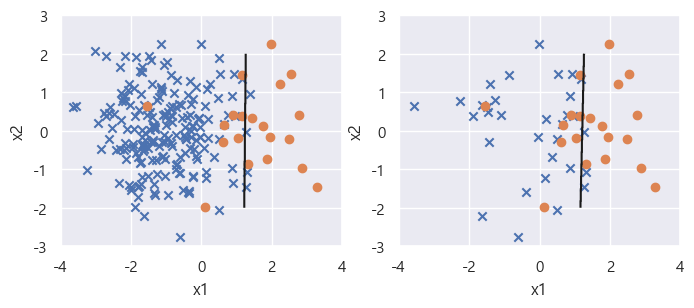

In [83]:
X_samp, y_samp = CondensedNearestNeighbour(random_state=0).fit_sample(X_imb, y_imb)

plt.figure(figsize=(8,3))
plt.subplot(121)
exam_my_scatter_view(X_imb, y_imb)
plt.subplot(122)
model_samp = exam_my_scatter_view(X_samp, y_samp)

* Python CNN CondensedNearestNeighbour()

0    5049
1    3318
Name: 전화해지여부, dtype: int64


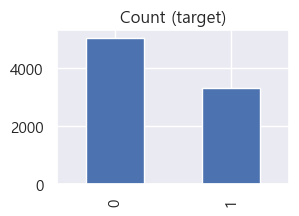

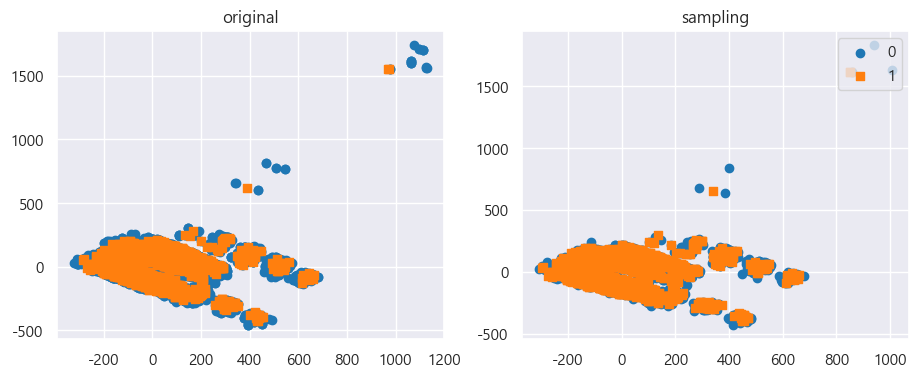

In [84]:
sm = CondensedNearestNeighbour(sampling_strategy='auto', random_state=0)

t0 = time.time()
X_samp, y_samp = sm.fit_sample(X, y)
t1 = time.time()
accuracy,  recall, precision, f1, auc, cm = my_score(X_samp, y_samp)
my_score_eval_list.append( ["Under", "CNN CondensedNearestNeighbour", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )


# print(f"{len(sm.sample_indices_)} rows Removed indexes:  {sm.sample_indices_}")
print( y_under.value_counts() )

my_scatter_view(X, y, X_samp, y_samp, 'CNN CondensedNearestNeighbour UnderSampler')

## ENN (Edited Nearest Neighbours)
* KNN방식이랑 비슷하며 소수 클래스 주변의 다중 클래스 값을 제거하는 방법

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours

In [ ]:
X_samp, y_samp = EditedNearestNeighbours(kind_sel="all", n_neighbors=5).fit_sample(X_imb, y_imb)

plt.figure(figsize=(8,3))
plt.subplot(121)
exam_my_scatter_view(X_imb, y_imb)
plt.subplot(122)
model_samp = exam_my_scatter_view(X_samp, y_samp)

* Python ENN (Edited Nearest Neighbours)

In [ ]:
sm = EditedNearestNeighbours(sampling_strategy='auto', kind_sel='all', n_neighbors=5)


t0 = time.time()
X_samp, y_samp = sm.fit_sample(X, y)
t1 = time.time()
accuracy,  recall, precision, f1, auc, cm = my_score(X_samp, y_samp)
my_score_eval_list.append( ["Under", "ENN(EditedNearestNeighbours)", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )


# print(f"{len(sm.sample_indices_)} rows Removed indexes:  {sm.sample_indices_}")
print( y_under.value_counts() )

my_scatter_view(X, y, X_samp, y_samp , 'ENN(Edited Nearest Neighbours) UnderSampler')

##  One sided Selection (2+3 Tomek link  + CNN)
* 토멕링크로 먼저 데이터를 제거한 후 분포가 큰 클래스 내부에서 CNN방법으로 데이터를 데이터를 제거하는 과정을 거치는 방법

In [ ]:
from imblearn.under_sampling import OneSidedSelection

In [ ]:
X_samp, y_samp = OneSidedSelection(random_state=0).fit_sample(X_imb, y_imb)

plt.figure(figsize=(8,3))
plt.subplot(121)
exam_my_scatter_view(X_imb, y_imb)
plt.subplot(122)
model_samp = exam_my_scatter_view(X_samp, y_samp)

* Python One sided Selection (2+3 Tomek link  + CNN)

In [ ]:
sm = OneSidedSelection(sampling_strategy='auto', random_state=0, n_neighbors=5, n_seeds_S=1)


t0 = time.time()
X_samp, y_samp = sm.fit_sample(X, y)
t1 = time.time()
accuracy,  recall, precision, f1, auc, cm = my_score(X_samp, y_samp)
my_score_eval_list.append( ["Under", "OneSidedSelection(2+3 Tomek + CNN)", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )


# print(f"{len(sm.sample_indices_)} rows Removed indexes:  {sm.sample_indices_}")
print( y_under.value_counts() )

my_scatter_view(X, y, X_samp, y_samp , 'One sided Selection(2+3 Tomek  + CNN) UnderSampler')

## Neighbourhood Cleansing Rule (3+4 CNN+ENN)
* 분포가 큰 데이터에 대한 제거 효과가 크지 않지만 좀 더 직관적으로 두 클래스를 나눌 수 있는 장점

In [ ]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

In [ ]:
X_samp, y_samp = NeighbourhoodCleaningRule(kind_sel="all", n_neighbors=5).fit_sample(X_imb, y_imb)

plt.figure(figsize=(8,3))
plt.subplot(121)
exam_my_scatter_view(X_imb, y_imb)
plt.subplot(122)
model_samp = exam_my_scatter_view(X_samp, y_samp)

* Python Neighbourhood Cleansing Rule (CNN+ENN)

In [ ]:
sm = NeighbourhoodCleaningRule(sampling_strategy='auto', n_neighbors=5, kind_sel='all', threshold_cleaning=0.5)

t0 = time.time()
X_samp, y_samp = sm.fit_sample(X, y)
t1 = time.time()
accuracy,  recall, precision, f1, auc, cm = my_score(X_samp, y_samp)
my_score_eval_list.append( ["Under", "Neighbourhood Cleansing Rule (3+4 CNN+ENN)", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )

# print(f"{len(sm.sample_indices_)} rows Removed indexes:  {sm.sample_indices_}")
print( y_under.value_counts() )

my_scatter_view(X, y, X_samp, y_samp , 'Neighbourhood Cleansing Rule (3+4 CNN+ENN)')

## Cluster Centroids
* 연산량, 연산시간이 매우 크다 (느리다)

* Python ClusterCentroids()

In [56]:
from imblearn.under_sampling import ClusterCentroids

0    3318
1    3318
Name: 전화해지여부, dtype: int64


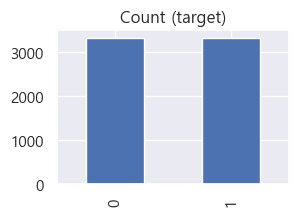

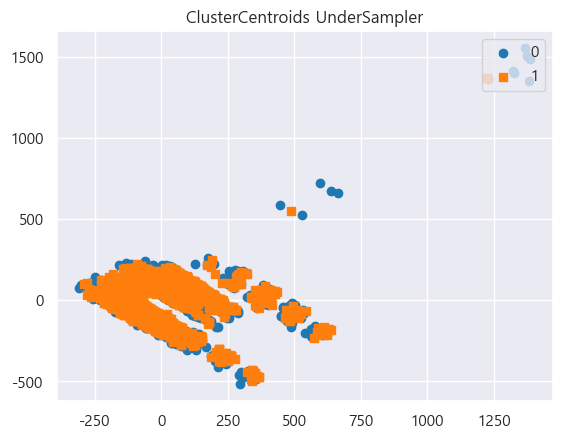

In [59]:
sm = ClusterCentroids(sampling_strategy='auto',random_state=0, voting='soft') #estimator=KMeans
t0 = time.time()
X_samp, y_samp = sm.fit_sample(X, y)
t1 = time.time()
accuracy,  recall, precision, f1, auc, cm = my_score(X_samp, y_samp)
my_score_eval_list.append( ["Under", "ClusterCentroids", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )

# print(f"{len(sm.sample_indices_)} rows Removed indexes:  {sm.sample_indices_}")
print( y_under.value_counts() )

my_scatter_view(X, y, X_samp, y_samp, 'ClusterCentroids UnderSampler')

# <font size=6><b> 오버샘플링

## Random Over Sampling
* 무작위로 분포가 작은 클래스의 데이터를 생성하는 방법

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
X_samp, y_samp = RandomOverSampler(random_state=0).fit_sample(X_imb, y_imb)

plt.figure(figsize=(8,3))
plt.subplot(121)
exam_my_scatter_view(X_imb, y_imb)
plt.subplot(122)
model_samp = exam_my_scatter_view(X_samp, y_samp)

* Python RandomOverSampler()

6636 rows Removed indexes:  [20934  5556 17901 ... 30169 30176 30198]
0    3318
1    3318
Name: 전화해지여부, dtype: int64


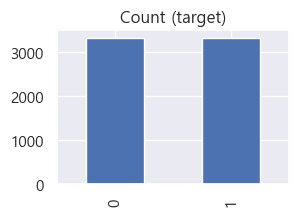

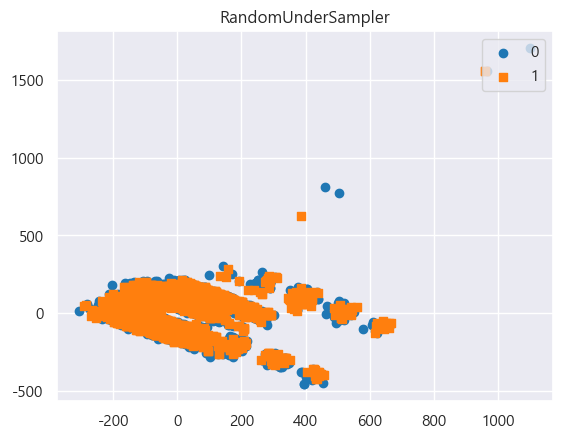

In [54]:
sm = RandomOverSampler()

t0 = time.time()
X_samp, y_samp = sm.fit_sample(X, y)
t1 = time.time()
accuracy,  recall, precision, f1, auc, cm = my_score(X_samp, y_samp)
my_score_eval_list.append( ["Over", "RandomOverSampler", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )

# print(f"{len(sm.sample_indices_)} rows Removed indexes:  {sm.sample_indices_}")
print( y_under.value_counts() )

my_scatter_view(X, y, X_samp, y_samp, 'RandomOverSampler')

## ADASYN(Adaptive Synthetic Sampling) 
*  분포가 작은 클래스 데이터와 그 데이터와 가장 가까운 무작위의 K개의 데이터 사이에 가상의 직선을 그려서 직선상에 존재하는 가상의 분포가 작은 클래스 데이터를 생성하는 방법

In [ ]:
from imblearn.over_sampling import ADASYN

In [ ]:
X_samp, y_samp = ADASYN(random_state=0).fit_sample(X_imb, y_imb)

plt.figure(figsize=(8,3))
plt.subplot(121)
exam_my_scatter_view(X_imb, y_imb)
plt.subplot(122)
model_samp = exam_my_scatter_view(X_samp, y_samp)

* Python ADASYN(Adaptive Synthetic Sampling)

6636 rows Removed indexes:  [20934  5556 17901 ... 30169 30176 30198]
0    3318
1    3318
Name: 전화해지여부, dtype: int64


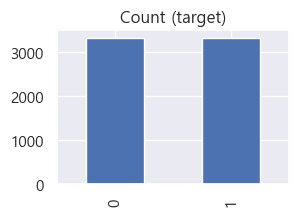

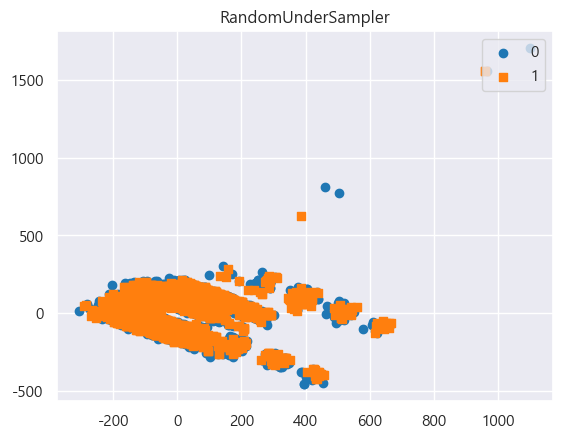

In [54]:
sm = ADASYN(sampling_strategy='auto', random_state=0, n_neighbors=5)
t0 = time.time()
X_samp, y_samp = sm.fit_sample(X, y)
t1 = time.time()
accuracy,  recall, precision, f1, auc, cm = my_score(X_samp, y_samp)
my_score_eval_list.append( ["Over", "ADASYN(Adaptive Synthetic Sampling)", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )

# print(f"{len(sm.sample_indices_)} rows Removed indexes:  {sm.sample_indices_}")
print( y_under.value_counts() )

my_scatter_view(X, y, X_samp, y_samp,  'ADASYN(Adaptive Synthetic Sampling) OverSampler')

## SMOTE
* ADASYN과 같은 방법론으로 데이터를 생성하지만 생성된 데이터가 분포가 적은 클래스에 포함되는 것이 아니라 분류 모형에 따라서 다르게 분류

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_samp, y_samp = SMOTE(random_state=0).fit_sample(X_imb, y_imb)

plt.figure(figsize=(8,3))
plt.subplot(121)
exam_my_scatter_view(X_imb, y_imb)
plt.subplot(122)
model_samp = exam_my_scatter_view(X_samp, y_samp)

* Python SMOTE()

6636 rows Removed indexes:  [20934  5556 17901 ... 30169 30176 30198]
0    3318
1    3318
Name: 전화해지여부, dtype: int64


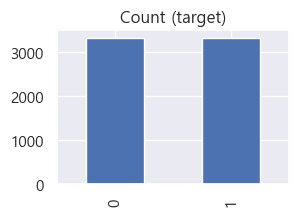

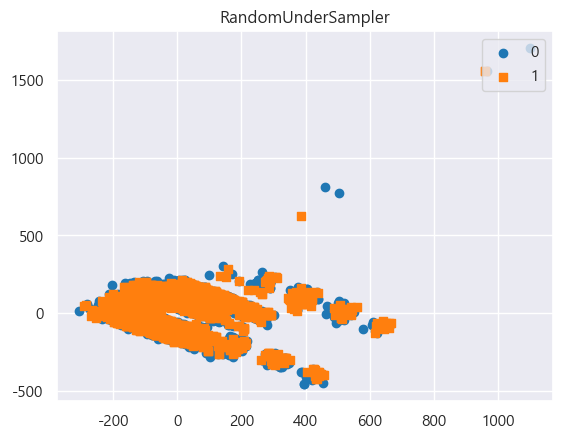

In [54]:
sm = SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5)
t0 = time.time()
X_samp, y_samp = sm.fit_sample(X, y)
t1 = time.time()
accuracy,  recall, precision, f1, auc, cm = my_score(X_samp, y_samp)
my_score_eval_list.append( ["Over", "SMOTE", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )

# print(f"{len(sm.sample_indices_)} rows Removed indexes:  {sm.sample_indices_}")
print( y_under.value_counts() )

my_scatter_view(X, y, X_samp, y_samp,  'SMOTE OverSampler')

# <font size=6><b> 복합 샘플링
* Combine Sampling : 오버샘플링 + 언더샘플링 결합

## SMOTEENN (SMOTE + ENN)
* 오버(SMOTE) + 언더(ENN)

In [ ]:
from imblearn.combine import SMOTEENN

In [ ]:
X_samp, y_samp = SMOTEENN(random_state=0).fit_sample(X_imb, y_imb)

plt.figure(figsize=(8,3))
plt.subplot(121)
exam_my_scatter_view(X_imb, y_imb)
plt.subplot(122)
model_samp = exam_my_scatter_view(X_samp, y_samp)

* Python SMOTEENN (SMOTE + ENN)

6636 rows Removed indexes:  [20934  5556 17901 ... 30169 30176 30198]
0    3318
1    3318
Name: 전화해지여부, dtype: int64


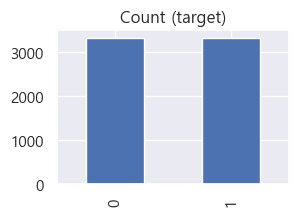

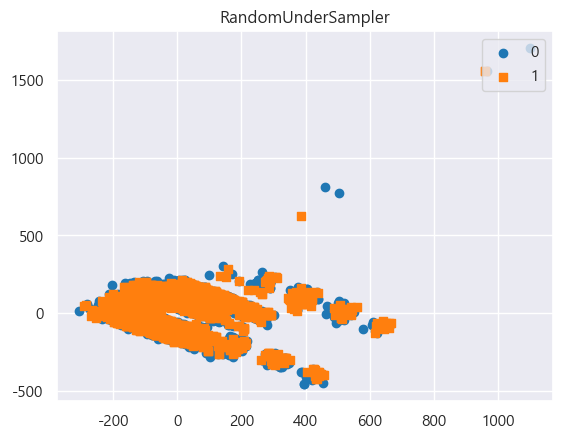

In [54]:
smote = SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5)
enn   = EditedNearestNeighbours(sampling_strategy='auto', kind_sel='all', n_neighbors=5)

sm = SMOTEENN(sampling_strategy='auto', random_state=0, smote=smote, enn=enn)
t0 = time.time()
X_samp, y_samp = sm.fit_sample(X, y)
t1 = time.time()
accuracy,  recall, precision, f1, auc, cm = my_score(X_samp, y_samp)
my_score_eval_list.append( ["Over+Under", "SMOTEENN (SMOTE + ENN)", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )

# print(f"{len(sm.sample_indices_)} rows Removed indexes:  {sm.sample_indices_}")
print( y_under.value_counts() )

my_scatter_view(X, y, X_samp, y_samp,  'SMOTEENN (SMOTE + ENN) Over+Under')

## SMOTETomek(SMOTE + TOMEK)
* 오버(SMOTE) + 언더(TOMEK)

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
X_samp, y_samp = SMOTETomek(random_state=0).fit_sample(X_imb, y_imb)

plt.figure(figsize=(8,3))
plt.subplot(121)
exam_my_scatter_view(X_imb, y_imb)
plt.subplot(122)
model_samp = exam_my_scatter_view(X_samp, y_samp)

* Python SMOTETomek(SMOTE + TOMEK)

6636 rows Removed indexes:  [20934  5556 17901 ... 30169 30176 30198]
0    3318
1    3318
Name: 전화해지여부, dtype: int64


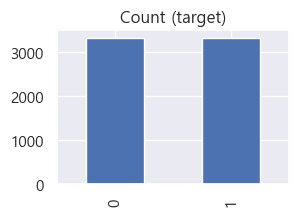

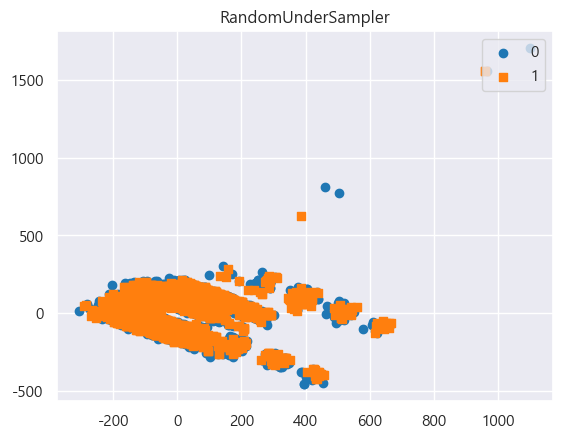

In [54]:
smote = SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5)
tomek = TomekLinks(sampling_strategy='auto') 

sm = SMOTETomek(sampling_strategy='auto', random_state=0, smote=smote, tomek=tomek)
t0 = time.time()
X_samp, y_samp = sm.fit_sample(X, y)
t1 = time.time()
accuracy,  recall, precision, f1, auc, cm = my_score(X_samp, y_samp)
my_score_eval_list.append( ["Over+Under", "SMOTETomek(SMOTE + TOMEK)", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )

# print(f"{len(sm.sample_indices_)} rows Removed indexes:  {sm.sample_indices_}")
print( y_under.value_counts() )

my_scatter_view(X, y, X_samp, y_samp,  'SMOTETomek(SMOTE + TOMEK) Over+Under')

In [ ]:
# my_score_eval_list.append( ["Over+Under", "SMOTETomek(SMOTE + TOMEK)", accuracy,  recall, precision, f1, auc, cm, np.round((t1 - t0), 2) ] )
score_df = pd.DataFrame(my_score_eval_list, columns=['type','model','accuracy','recall','precision','f1','auc','cm','runtime'])
score_df.head()

In [ ]:
pd.to_csv("./score_df.csv", index=False)